<a href="https://colab.research.google.com/github/wojr21/courses/blob/main/DS_bootcamp_exercises/231_240_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Science Bootcamp

### Spis treści:
* [Import biblioteki](#0)
* [Ćwiczenie 231](#1)
* [Ćwiczenie 232](#2)
* [Ćwiczenie 233](#3)
* [Ćwiczenie 234](#4)
* [Ćwiczenie 235](#5)
* [Ćwiczenie 236](#6)
* [Ćwiczenie 237](#7)
* [Ćwiczenie 238](#8)
* [Ćwiczenie 239](#9)
* [Ćwiczenie 240](#10)

### <a name='0'></a>Import biblioteki

In [1]:
import numpy as np
import pandas as pd

np.__version__

'1.19.4'

### <a name='1'></a> Ćwiczenie 231
Zaimportuj bibliotekę _tensorflow_ w wersji 2.x.

In [2]:
%tensorflow_version 2.x
import tensorflow as tf

tf.__version__

'2.4.0'

Załaduj dane Fashion MNIST wykorzystując bibliotekę _tensorflow_. Odpowiednio zbiór treningowy (_X\_train_, _y\_train_) oraz testowy (_X\_test_, _y\_test_).

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Sprawdź rozmiar zbiorów treningowych i testowych.

In [5]:
print(f'train_images shape: {train_images.shape}')
print(f'train_labels shape: {train_labels.shape}')
print(f'test_images shape: {test_images.shape}')
print(f'test_labels shape: {test_labels.shape}')

train_images shape: (60000, 28, 28)
train_labels shape: (60000,)
test_images shape: (10000, 28, 28)
test_labels shape: (10000,)


### <a name='2'></a> Ćwiczenie 232 
Wykorzytując bibliotekę _matplotlib_ wyświetl obraz ze zbioru treningowego z indeksem 40.

In [6]:
import matplotlib.pyplot as plt

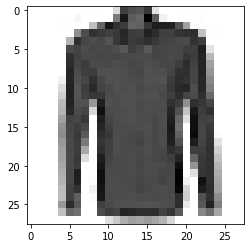

In [11]:
plt.imshow(train_images[40], cmap = 'gray_r')
plt.show()

Wyświetl numer klasy dla próbki ze zbioru treningowego z ineksem 40.

In [12]:
train_labels[40]

6

### <a name='3'></a> Ćwiczenie 233
Wystandaryzuj dane. Podziel wartości tablic _X\_train_ oraz _X\_test_ przez wartość 255.0.

In [13]:
X_train = train_images / 255.0
X_test = test_images / 255.0

### <a name='4'></a> Ćwiczenie 234
Zaimportuj klasę _Sequential_ z biblioteki _tensorflow_ wykorzystując pakiet _keras_.

In [15]:
from tensorflow.keras.models import Sequential

Zaimportuj warstwy _Flatten_ oraz _Dense_ z biblioteki _tensorflow_ wykorzystując pakiet _keras_.

In [16]:
from tensorflow.keras.layers import Flatten, Dense

### <a name='5'></a> Ćwiczenie 235
Zbuduj model klasy _Sequential_.

In [17]:
model = Sequential()

Dodaj pierwszą warstwę typu _Flatten_ wraz z odpowiednio dobranym parametrem _input_shape_.

In [18]:
model.add(Flatten(input_shape = (28, 28)))

Dodaj kolejną warstwę typu _Dense_ z 128 neuronami i funkcją aktywacji _relu_.

In [19]:
model.add(Dense(units = 128, activation = 'relu'))

Dodaj ostatnią warstwę typu _Dense_ z 10 neuronami i funkcją aktywacji _softmax_.

In [20]:
model.add(Dense(units = 10, activation = 'softmax'))

Wyświetl podsumowanie modelu.

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### <a name='6'></a> Ćwiczenie 236
Skompiluj model. Wykorzystaj optymalizator _rmsprop_, funkcję straty _sparse_categorical_crossentropy_ oraz metrykę _accuracy_.

In [22]:
model.compile(optimizer = 'rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

### <a name='7'></a> Ćwiczenie 237
Dopasuj model do danych treningowych, ustawiając 10 epok oraz podział na zbiór walidacyjny wynoszący 0.2.

In [23]:
history = model.fit(x = X_train, y = train_labels, batch_size = 32, epochs = 10,
                    validation_split = 0.2)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6855 - accuracy: 0.7605 - val_loss: 0.4490 - val_accuracy: 0.8327
Epoch 2/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3938 - accuracy: 0.8578 - val_loss: 0.3928 - val_accuracy: 0.8616
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3569 - accuracy: 0.8731 - val_loss: 0.3712 - val_accuracy: 0.8695
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3311 - accuracy: 0.8845 - val_loss: 0.3586 - val_accuracy: 0.8781
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3164 - accuracy: 0.8850 - val_loss: 0.3865 - val_accuracy: 0.8679
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3027 - accuracy: 0.8917 - val_loss: 0.3624 - val_accuracy: 0.8783
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2915 - accuracy: 0.8973 - val_loss: 0.3582 - val_accuracy:

### <a name='8'></a> Ćwiczenie 238
Dokonaj predykcji modelu na podstawie danych testowych.

In [24]:
y_pred = model.predict_classes(X_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Zbuduj macierz konfuzji (macierz pomyłek).

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix(test_labels, y_pred)

array([[764,   0,  38,  39,   4,   0, 144,   1,  10,   0],
       [  0, 968,   1,  23,   2,   0,   6,   0,   0,   0],
       [  8,   0, 815,  12,  80,   0,  81,   0,   4,   0],
       [ 10,   6,  27, 869,  57,   1,  24,   0,   6,   0],
       [  0,   0, 115,  14, 793,   0,  75,   0,   3,   0],
       [  0,   0,   0,   1,   0, 944,   0,  31,   2,  22],
       [ 80,   1, 101,  31,  55,   0, 715,   0,  17,   0],
       [  0,   0,   0,   0,   0,  10,   0, 971,   0,  19],
       [  1,   0,   2,   2,   4,   3,   3,   5, 980,   0],
       [  0,   0,   0,   0,   0,  11,   1,  48,   0, 940]])

### <a name='9'></a> Ćwiczenie 239
Zbuduj obiekt pandas _DataFrame_ zawierający predykcje modelu. Nadaj nazwę kolumny _prediction_ i przypisz do zmiennej _results_.

In [27]:
results = pd.DataFrame(data = y_pred, columns = ['prediction'])
results

,prediction
0,9
1,2
2,1
3,1
4,6
...,...
9995,9
9996,1
9997,8
9998,1


Przypisz nową kolumnę z wartościami ze zmiennej _y\_test_ i nazwij ją _y\_test_.

In [28]:
results['y_test'] = test_labels
results

,prediction,y_test
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6
...,...,...
9995,9,9
9996,1,1
9997,8,8
9998,1,1


Przypisz nową kolumnę o nazwie _is_misclassified_, która zwróci 1, gdy próbki zostaną błędnie sklasyfikowane, w przeciwnym przypadku 0.

In [34]:
results['is_misclassified'] = (results['prediction'] != results['y_test']).astype(int)
results

,prediction,y_test,is_misclassified
0,9,9,0
1,2,2,0
2,1,1,0
3,1,1,0
4,6,6,0
...,...,...,...
9995,9,9,0
9996,1,1,0
9997,8,8,0
9998,1,1,0


### <a name='10'></a> Ćwiczenie 240
Zapisz obiekt _results_ do pliku _results.csv_.

In [35]:
results.to_csv('results.csv')

In [36]:
!head results.csv

,prediction,y_test,is_misclassified
0,9,9,0
1,2,2,0
2,1,1,0
3,1,1,0
4,6,6,0
5,1,1,0
6,4,4,0
7,6,6,0
8,5,5,0
